# Learning Work Embeddings

# **Group No :151**
## **Group Member Names:**

Peyala Samarasimha Reddy - 2023AA05072 100% Contribution

Monisha G - 2023AA05536 100% Contribution

Akshay Mohan - 2023AA05315 100% Contribution

Sreelakshmi Ajith - 2023AA05316 100% Contribution

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.random.set_seed(42)

## Dataset - IMDB

In [ ]:
imdb = keras.datasets.imdb

max_features = 20000

(Xtrain, Ytrain), (Xtest, Ytest) = imdb.load_data(num_words = max_features)


# Downloading data from https://storage.googleapis.com/tensorflow/tf-keras-datasets/imdb.npz
# 17465344/17464789 [==============================] - 8s 0us/step


print(len(Xtrain), len(Ytrain))
print(len(Xtest), len(Ytest))

Xtrain = keras.preprocessing.sequence.pad_sequences(Xtrain, maxlen =25)
Xtest = keras.preprocessing.sequence.pad_sequences(Xtest, maxlen =25)

print(len(Xtrain), len(Ytrain))
print(len(Xtest), len(Ytest))

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
25000 25000
25000 25000
25000 25000
25000 25000


## LSTM

In [ ]:
lstmModel = keras.models.Sequential()

lstmModel.add(keras.layers.Embedding(input_dim = max_features, output_dim = 128))

lstmModel.add(keras.layers.LSTM(128, dropout=0.2)) #, recurrent_dropout=0.2

lstmModel.add(keras.layers.Dense(1, activation = 'sigmoid'))

lstmModel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize.
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing.

lstmModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# train the model

history = lstmModel.fit(Xtrain, Ytrain, epochs = 15, batch_size=16, validation_split=0.2, verbose=1 )

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.6899 - loss: 0.5659 - val_accuracy: 0.7698 - val_loss: 0.4641
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.8353 - loss: 0.3645 - val_accuracy: 0.7626 - val_loss: 0.5003
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 27ms/step - accuracy: 0.9050 - loss: 0.2298 - val_accuracy: 0.7614 - val_loss: 0.6628
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.9465 - loss: 0.1436 - val_accuracy: 0.7504 - val_loss: 0.8510
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.9631 - loss: 0.0989 - val_accuracy: 0.7372 - val_loss: 1.1171
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 26ms/step - accuracy: 0.9715 - loss: 0.0791 - val_accuracy: 0.7344 - val_loss: 1.0705
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.9817 - loss: 0.0528 - val_accuracy: 0.7348 - val_loss: 1.1987
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.9878 -

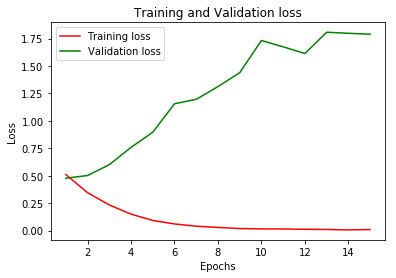

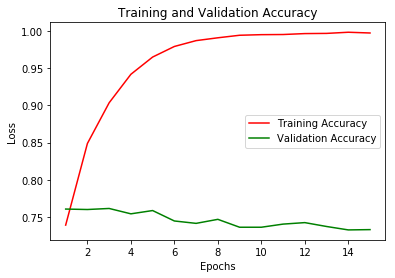

In [ ]:
# plotting training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# plotting training and validation Accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, color='red', label='Training Accuracy')
plt.plot(epochs, val_acc, color='green', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
testLoss, testAccuracy = lstmModel.evaluate(Xtest, Ytest)
print(testLoss, testAccuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7313 - loss: 1.8497
1.821761131286621 0.7311199903488159


# **MODIFICATIONS**

## **Use a different optimizer**

In [ ]:
#ADAM replaced by SGD
from tensorflow.keras.optimizers import SGD

lstmModel.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#RMSProp
from tensorflow.keras.optimizers import RMSprop
lstmModel.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


## **Train for more epochs**

In [ ]:
#epoch increased to 20
history_modified = lstmModel.fit(Xtrain, Ytrain, epochs = 20, batch_size=64, validation_split=0.2, verbose=1 )

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 0.9934 - loss: 0.0222 - val_accuracy: 0.7368 - val_loss: 1.7653
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.9938 - loss: 0.0186 - val_accuracy: 0.7374 - val_loss: 1.7368
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.9952 - loss: 0.0137 - val_accuracy: 0.7386 - val_loss: 1.7177
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.9955 - loss: 0.0130 - val_accuracy: 0.7382 - val_loss: 1.7081
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.9965 - loss: 0.0123 - val_accuracy: 0.7380 - val_loss: 1.7071
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.9963 - loss: 0.0102 - val_accuracy: 0.7370 - val_loss: 1.7037
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9973 - loss: 0.0090 - val_accuracy: 0.7378 - val_loss: 1.7061
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9964 - loss: 0.0105 - 

In [ ]:
#Rmsprop
history_rms = lstmModel.fit(Xtrain, Ytrain, epochs=20, batch_size=64, validation_split=0.2, verbose=1 )


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.9987 - loss: 0.0044 - val_accuracy: 0.7362 - val_loss: 2.0575
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.9994 - loss: 0.0021 - val_accuracy: 0.7344 - val_loss: 2.1209
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.9998 - loss: 0.0013 - val_accuracy: 0.7382 - val_loss: 2.1908
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.9999 - loss: 6.4327e-04 - val_accuracy: 0.7414 - val_loss: 2.2825
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.9999 - loss: 6.0977e-04 - val_accuracy: 0.7394 - val_loss: 2.3280
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.9994 - loss: 0.0012 - val_accuracy: 0.7416 - val_loss: 2.2973
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.9998 - loss: 6.7363e-04 - val_accuracy: 0.7410 - val_loss: 2.3313
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.9999 - los

## **Use the learned network to predict the sentiments for new sentences**

In [ ]:
# Example new sentences
new_sentences = ["The movie was fantastic!", "I am feeling sad."]

# Preprocess the new sentences (tokenization, padding, etc.)
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer


tokenizer = Tokenizer(num_words=10000)

new_sequences = tokenizer.texts_to_sequences(new_sentences)
new_padded_sequences = pad_sequences(new_sequences, maxlen=100)

# Use the model to predict sentiments
predictions = lstmModel.predict(new_padded_sequences)

# Output predictions
for i, sentence in enumerate(new_sentences):
    print(f"Sentence: {sentence}")
    print(f"Predicted Sentiment: {'Positive' if predictions[i] > 0.5 else 'Negative'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
Sentence: The movie was fantastic!
Predicted Sentiment: Positive
Sentence: I am feeling sad.
Predicted Sentiment: Positive


## **Graph plot after modification**

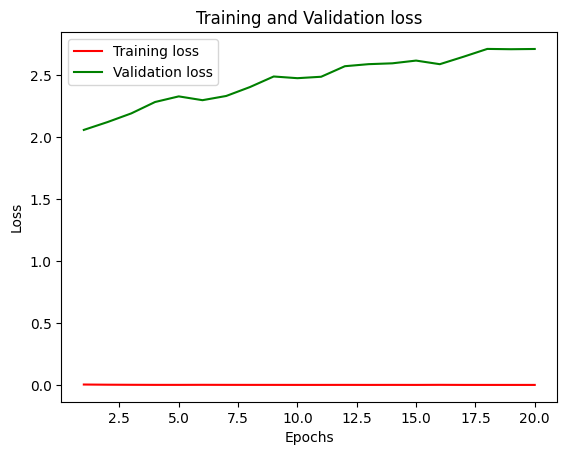

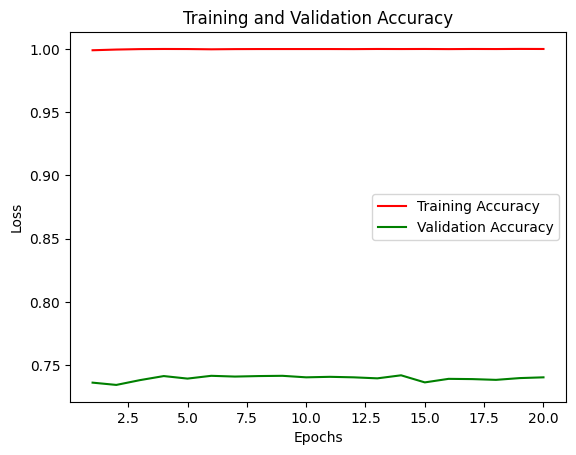

In [ ]:
# plotting training and validation loss

loss = history_rms.history['loss']
val_loss = history_rms.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# plotting training and validation Accuracy

acc = history_rms.history['accuracy']
val_acc = history_rms.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, color='red', label='Training Accuracy')
plt.plot(epochs, val_acc, color='green', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()